In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
iris = pd.read_csv('/content/drive/MyDrive/ML/Datasets/iris.csv')

In [ ]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# prompt: covert variety coloum into numeric values

dist = {
    'Setosa': 1,
    'Versicolor': 2,
    'Virginica': 3
}

iris['variety'] = iris['variety'].map(dist)

print(iris)


     sepal.length  sepal.width  petal.length  petal.width  variety
0             5.1          3.5           1.4          0.2        1
1             4.9          3.0           1.4          0.2        1
2             4.7          3.2           1.3          0.2        1
3             4.6          3.1           1.5          0.2        1
4             5.0          3.6           1.4          0.2        1
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

[150 rows x 5 columns]


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

features = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
target = iris[['variety']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
y_train shape: (120, 1)
X_test shape: (30, 4)
y_test shape: (30, 1)


In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel='linear',C=1.0)

classifier.fit(X_train, y_train)


# Predict the labels of new data points
predicted_labels = classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predicted_labels

array([1, 2, 2, 1, 3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 3, 2, 1, 1, 2, 3])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_labels)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
from sklearn.model_selection import cross_val_score
accuracires = cross_val_score(estimator=classifier,X = X_train , y = y_train , cv = 10)
print("Accuracy : {:.2f}%".format(accuracires.mean()*100))
print("Accuracy : {:.2f}%".format(accuracires.std()*100))

Accuracy : 98.33%
Accuracy : 3.33%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_labels)

print(cm)


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


     variety
91         2
135        3
69         2
128        3
114        3


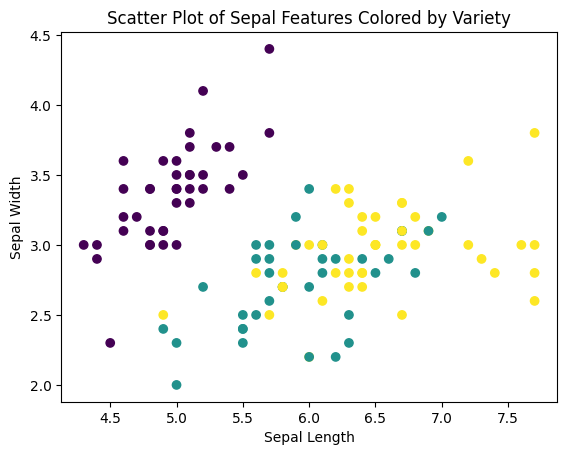

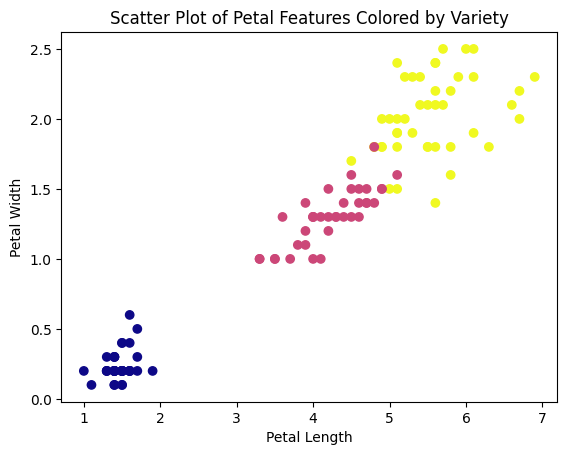

In [ ]:


import matplotlib.pyplot as plt
!pip install pandas
print(y_train.head())
# Extract sepal and petal features
sepal_length = X_train['sepal.length']
sepal_width = X_train['sepal.width']
petal_length = X_train['petal.length']
petal_width = X_train['petal.width']
y_train_list = y_train.values.tolist()
# Create scatter plot with colored points based on variety
plt.scatter(sepal_length, sepal_width, c=y_train_list, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Features Colored by Variety')
plt.show()

# Create another scatter plot with different colors
plt.scatter(petal_length, petal_width, c=y_train_list, cmap='plasma')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Features Colored by Variety')
plt.show()